# 16IT146 &emsp; &emsp;  &emsp;  &emsp;  &emsp;  &emsp;    IT441: Data Science

## **Practical 4 : Data Exploration(Loan Prediction): Variable Identification, Univariate Analysis, Bi-variate Analysis, Missing values treatment, Outlier treatment, Variable transformation, Variable creation**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os

# **Missing Value Treatment**

In [43]:
fullData = pd.read_csv("LoanPrediction.csv")
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
#Imputing Missing values with mean for continuous variable
fullData['LoanAmount'].fillna(fullData['LoanAmount'].mean(), inplace=True)

fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mean(), inplace=True)
fullData['ApplicantIncome'].fillna(fullData['ApplicantIncome'].mean(), inplace=True)
fullData['CoapplicantIncome'].fillna(fullData['CoapplicantIncome'].mean(), inplace=True)
fullData['Self_Employed'].fillna(fullData['Self_Employed'].mode()[0], inplace=True) 

#Imputing Missing values with mode for categorical variables
fullData['Gender'].fillna(fullData['Gender'].mode()[0], inplace=True)
fullData['Married'].fillna(fullData['Married'].mode()[0], inplace=True)
fullData['Dependents'].fillna(fullData['Dependents'].mode()[0], inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mode()[0], inplace=True)
fullData['Credit_History'].fillna(fullData['Credit_History'].mode()[0], inplace=True)

In [45]:
fullData['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [50]:
fullData.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## **Univariate Analysis **

In [4]:
fullData['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [5]:
fullData['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

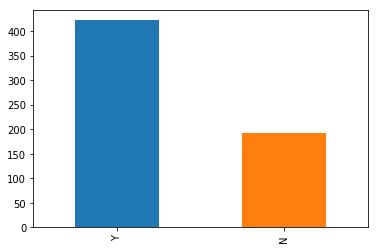

In [6]:
fullData['Loan_Status'].value_counts().plot.bar()

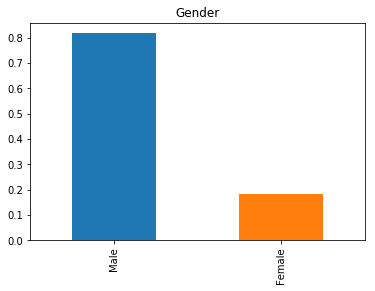

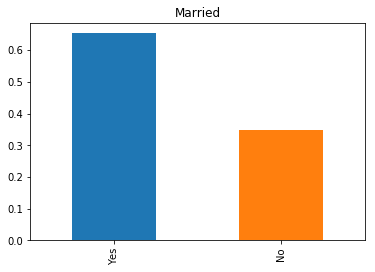

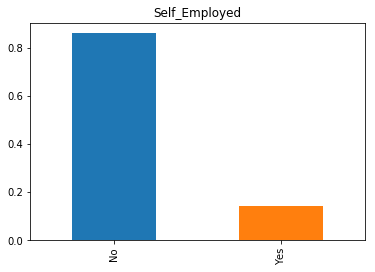

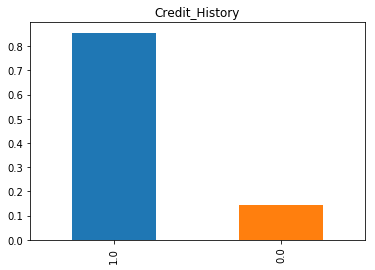

In [13]:
#Independent Categorical Variable
fullData['Gender'].value_counts(normalize=True).plot.bar( title= 'Gender') 
plt.show()
fullData['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.show()
fullData['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.show()
fullData['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

It can be inferred from the above bar plots that:
<br>80% applicants in the dataset are male.
<br>Around 65% of the applicants in the dataset are married.
<br>Around 15% applicants in the dataset are self employed.
<br>Around 85% applicants have repaid their debts.

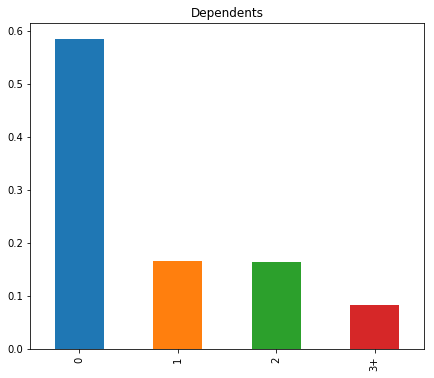

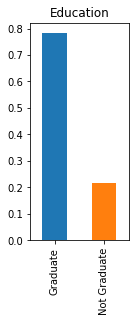

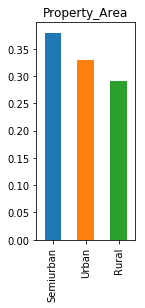

In [17]:
#Independent Variable (Ordinal)
plt.subplot(131)
fullData['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.show()
plt.subplot(132) 
fullData['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.show()
plt.subplot(133) 
fullData['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

Following inferences can be made from the above bar plots:
<br>Most of the applicants don’t have any dependents.
<br>Around 80% of the applicants are Graduate.
<br>Most of the applicants are from Semiurban area.

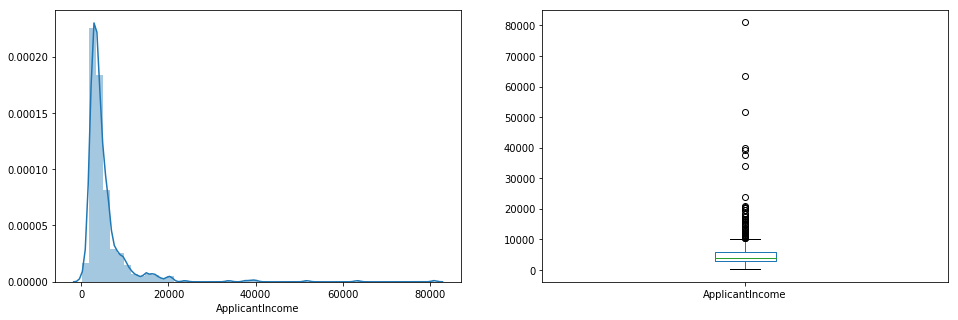

In [18]:
#Independent Variable (Numerical)
plt.figure(1) 
plt.subplot(121) 
sns.distplot(fullData['ApplicantIncome']); 
plt.subplot(122) 
fullData['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. 

Text(0.5,0.98,'')

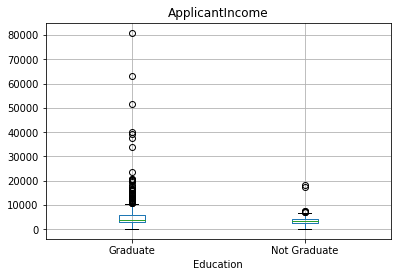

In [21]:
fullData.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

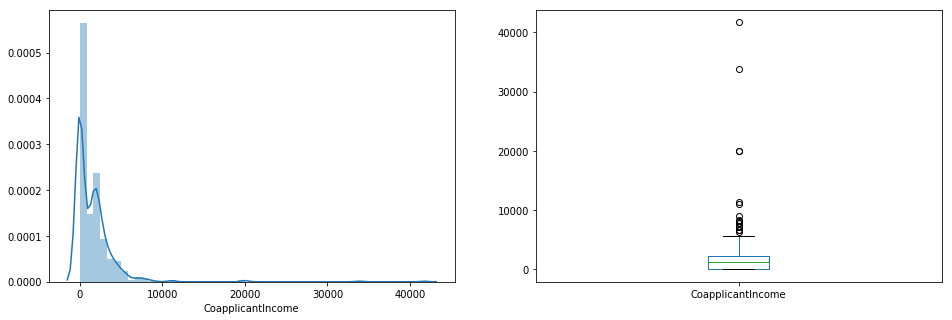

In [22]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(fullData['CoapplicantIncome']); 
plt.subplot(122) 
fullData['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

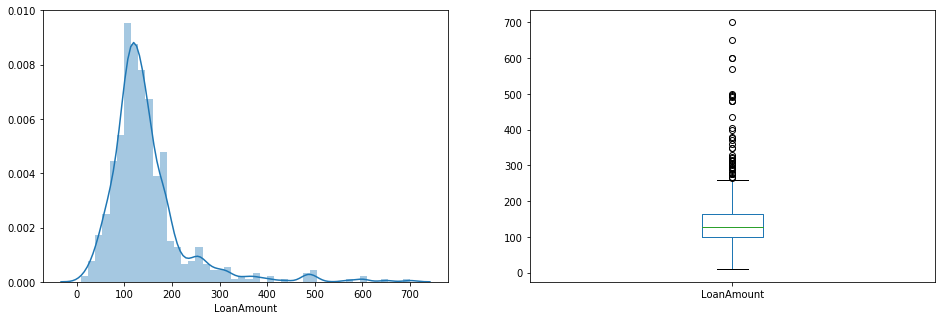

In [23]:
plt.figure(1) 
plt.subplot(121) 
df=fullData.dropna() 
sns.distplot(fullData['LoanAmount']); 
plt.subplot(122) 
fullData['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal.

## **Bivariate Analysis **

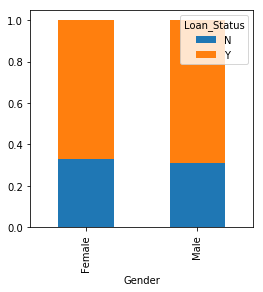

In [26]:
Gender=pd.crosstab(fullData['Gender'],fullData['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

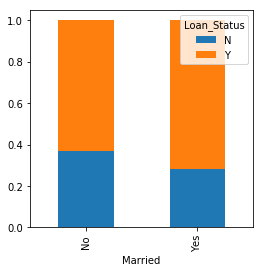

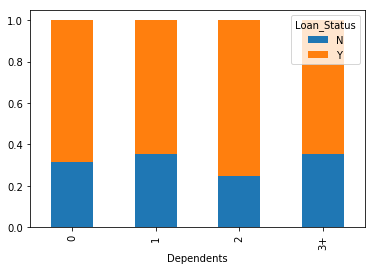

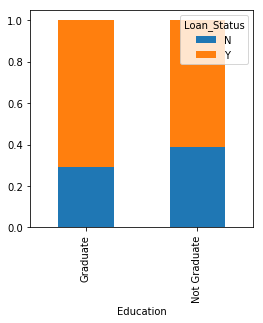

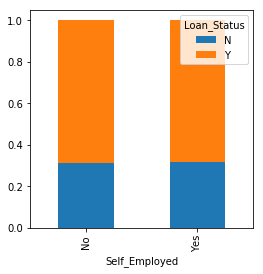

In [28]:
Married=pd.crosstab(fullData['Married'],fullData['Loan_Status']) 
Dependents=pd.crosstab(fullData['Dependents'],fullData['Loan_Status']) 
Education=pd.crosstab(fullData['Education'],fullData['Loan_Status']) 
Self_Employed=pd.crosstab(fullData['Self_Employed'],fullData['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

<ui>Proportion of married applicants is higher for the approved loans.
<ui>Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
<ui>There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

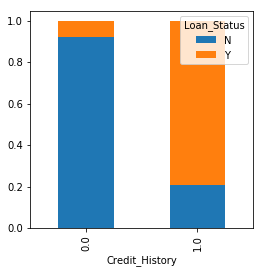

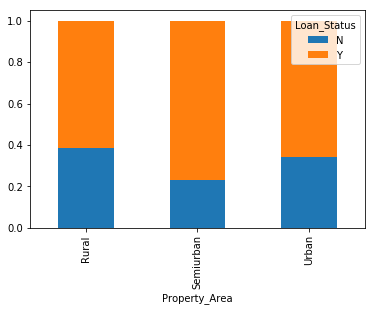

In [29]:
Credit_History=pd.crosstab(fullData['Credit_History'],fullData['Loan_Status']) 
Property_Area=pd.crosstab(fullData['Property_Area'],fullData['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

<ui>It seems people with credit history as 1 are more likely to get their loans approved.
<ui>Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

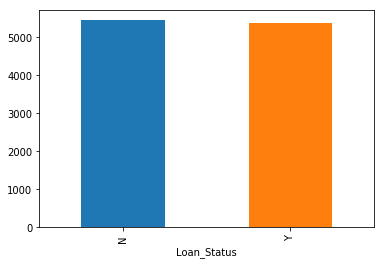

In [30]:
#Numeric Independent Variables vs Target Variable 
fullData.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin

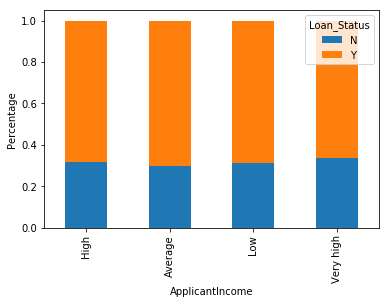

In [32]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
fullData['Income_bin']=pd.cut(fullData['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(fullData['Income_bin'],fullData['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

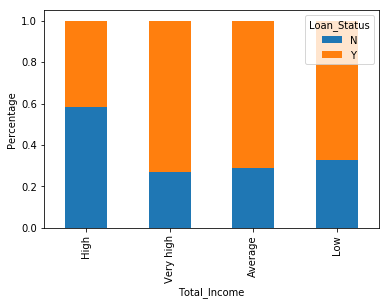

In [33]:
fullData['Total_Income']=fullData['ApplicantIncome']+fullData['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
fullData['Total_Income_bin']=pd.cut(fullData['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(fullData['Total_Income_bin'],fullData['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

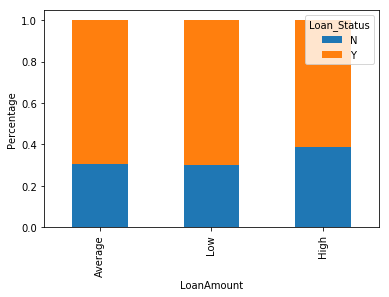

In [34]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
fullData['LoanAmount_bin']=pd.cut(fullData['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(fullData['LoanAmount_bin'],fullData['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

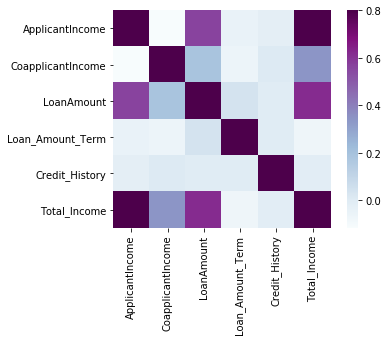

In [40]:
sns.heatmap(fullData.corr(), vmax=.8, square=True, cmap="BuPu");

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

# **Outline Treatement**

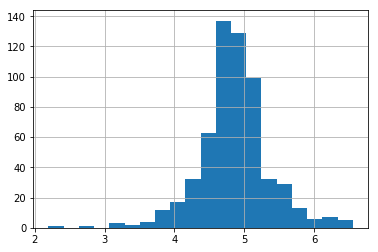

In [51]:
fullData['LoanAmount_log'] = np.log(train['LoanAmount']) 
fullData['LoanAmount_log'].hist(bins=20) 

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

<b>Conclusion:</b> In this practical I have studied and performed univariate analysis, bivariate analysis, missing value and outliers treatment.